## Data Mining and Machine Learning 
### Logistic Regression for mixed type datasets
###  Libraries: scikit-learn and h2o
#### Edgar Acuna
#### March 2019

In [17]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import h2o
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.naive_bayes import H2ONaiveBayesEstimator
from h2o.estimators.glm   import H2OGeneralizedLinearEstimator
#h2o.connect()
#h2o.no_progress()
h2o.init(ip="localhost", port=54323)

Checking whether there is an H2O instance running at http://localhost:54323. connected.


H2O cluster uptime:,1 day 6 hours 15 mins
H2O cluster timezone:,America/La_Paz
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.2
H2O cluster version age:,2 months and 1 day
H2O cluster name:,H2O_from_python_edgar2017_ivtlb5
H2O cluster total nodes:,1
H2O cluster free memory:,1.622 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


### I-Applying Naive Bayes to dataset  Loan using H20

In [18]:
loan = h2o.import_file("c://datamining/loan.csv")
loan

Parse progress: |█████████████████████████████████████████████████████████| 100%


Sexo,Familia,CasPropia,AnosEmpleo,Sueldo,StatustMarital,Prestamo
Hombre,3,No,17,2500,Soltero,No
Mujer,5,Si,10,3000,Casado,Si
Mujer,4,No,15,2000,Viudo,No
Hombre,3,Si,16,2800,Soltero,Si
Hombre,6,Si,11,4000,Viudo,Si
Mujer,4,Si,26,3200,Soltero,Si
Mujer,2,Si,14,1800,Soltero,No
Hombre,5,Si,10,3750,Casado,Si
Hombre,6,No,18,2970,Divorciado,No
Hombre,4,Si,12,3350,Divorciado,No


In [19]:
myx=['Sexo','Familia','CasPropia', 'AnosEmpleo','Sueldo','StatustMarital']
loan['Prestamo']=loan['Prestamo'].asfactor()
myy="Prestamo"
# Create test/train split
#train, test = vehicle.split_frame(ratios=[0.75], seed=1)
model=H2ONaiveBayesEstimator()
model.train(myx, myy, training_frame = loan)
y_pred=model.predict(loan)
print((y_pred['predict']==loan['Prestamo']).sum()/float(len(loan)))
model.model_performance(loan)

naivebayes Model Build progress: |████████████████████████████████████████| 100%
naivebayes prediction progress: |█████████████████████████████████████████| 100%
0.88

ModelMetricsBinomial: naivebayes
** Reported on test data. **

MSE: 0.08549467282789719
RMSE: 0.29239472093028146
LogLoss: 0.2778253908660602
Mean Per-Class Error: 0.09999999999999998
AUC: 0.96
pr_auc: 0.9083392587804353
Gini: 0.9199999999999999
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.45824144848381426: 


,No,Si,Error,Rate
No,7.0,3.0,0.3,(3.0/10.0)
Si,0.0,15.0,0.0,(0.0/15.0)
Total,7.0,18.0,0.12,(3.0/25.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4582414,0.9090909,17.0
max f2,0.4582414,0.9615385,17.0
max f0point5,0.6756497,0.9523810,11.0
max accuracy,0.6756497,0.88,11.0
max precision,0.9996507,1.0,0.0
max recall,0.4582414,1.0,17.0
max specificity,0.9996507,1.0,0.0
max absolute_mcc,0.6756497,0.7844645,11.0
max min_per_class_accuracy,0.5195887,0.8666667,13.0
max mean_per_class_accuracy,0.6756497,0.9,11.0


Gains/Lift Table: Avg response rate: 60.00 %, avg score: 57.88 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.04,0.9995576,1.6666667,1.6666667,1.0,0.9996507,1.0,0.9996507,0.0666667,0.0666667,66.6666667,66.6666667
,2,0.04,0.9994645,0.0,1.6666667,0.0,0.0,1.0,0.9996507,0.0,0.0666667,-100.0,66.6666667
,3,0.04,0.9993714,0.0,1.6666667,0.0,0.0,1.0,0.9996507,0.0,0.0666667,-100.0,66.6666667
,4,0.04,0.9992784,0.0,1.6666667,0.0,0.0,1.0,0.9996507,0.0,0.0666667,-100.0,66.6666667
,5,0.08,0.9992516,1.6666667,1.6666667,1.0,0.9992628,1.0,0.9994568,0.0666667,0.1333333,66.6666667,66.6666667
,6,0.12,0.9990432,1.6666667,1.6666667,1.0,0.9992065,1.0,0.9993733,0.0666667,0.2,66.6666667,66.6666667
,7,0.16,0.9980499,1.6666667,1.6666667,1.0,0.9987983,1.0,0.9992296,0.0666667,0.2666667,66.6666667,66.6666667
,8,0.2,0.9644366,1.6666667,1.6666667,1.0,0.9975509,1.0,0.9988939,0.0666667,0.3333333,66.6666667,66.6666667
,9,0.32,0.8380636,1.6666667,1.6666667,1.0,0.9110427,1.0,0.9659497,0.2,0.5333333,66.6666667,66.6666667
,10,0.4,0.7071564,1.6666667,1.6666667,1.0,0.7544842,1.0,0.9236566,0.1333333,0.6666667,66.6666667,66.6666667


### II. Applying Logistic Regression to dataset loan using h20

In [20]:
loan['Sexo'] = loan['Sexo'].asfactor()
loan["CasPropia"]=loan['CasPropia'].asfactor()
loan['StatustMarital']=loan['StatustMarital'].asfactor()
loan['Prestamo']=loan['Prestamo'].asfactor()

predictors = ["Sexo","Familia", "CasPropia","AnosEmpleo", "Sueldo","StatustMarital"]
response_col = "Prestamo"

In [21]:
glm_model = H2OGeneralizedLinearEstimator(family= "binomial", lambda_ = 0, compute_p_values = True)
glm_model.train(predictors, response_col, training_frame= loan)

# Coefficients that can be applied to the non-standardized data.
print(glm_model.coef())

glm Model Build progress: |███████████████████████████████████████████████| 100%


C:\Users\edgar2017\Anaconda2\envs\ipykernel_py3\lib\site-packages\h2o\job.py:69: UserWarning: Reached maximum number of iterations 50!
  warnings.warn(w)


{'Sueldo': 0.09868220640412526, 'Intercept': -269.16800091477114, 'AnosEmpleo': 2.9574452082674885, 'StatustMarital.Viudo': -10.697821309701698, 'CasPropia.Si': -1.4732452885828509, 'StatustMarital.Divorciado': -102.24457434194633, 'Sexo.Mujer': -4.160890209638011, 'StatustMarital.Soltero': -18.717097643950506, 'Familia': -7.283161660798802}


In [22]:
glm_model

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1553016161431_68


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 1.9847663384706934e-12
RMSE: 1.4088173545462497e-06
LogLoss: 5.98743562424881e-07
Null degrees of freedom: 24
Residual degrees of freedom: 16
Null deviance: 33.650583350462824
Residual deviance: 2.993717812140991e-05
AIC: 18.000029937178123
AUC: 1.0
pr_auc: 0.4666666666666667
Gini: 1.0
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.999995968920957: 


,No,Si,Error,Rate
No,10.0,0.0,0.0,(0.0/10.0)
Si,0.0,15.0,0.0,(0.0/15.0)
Total,10.0,15.0,0.0,(0.0/25.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.9999960,1.0,7.0
max f2,0.9999960,1.0,7.0
max f0point5,0.9999960,1.0,7.0
max accuracy,0.9999960,1.0,7.0
max precision,1.0,1.0,0.0
max recall,0.9999960,1.0,7.0
max specificity,1.0,1.0,0.0
max absolute_mcc,0.9999960,1.0,7.0
max min_per_class_accuracy,0.9999960,1.0,7.0
max mean_per_class_accuracy,0.9999960,1.0,7.0


Gains/Lift Table: Avg response rate: 60.00 %, avg score: 60.00 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.32,1.0,1.6666667,1.6666667,1.0,1.0,1.0,1.0,0.5333333,0.5333333,66.6666667,66.6666667
,2,0.4,1.0000000,1.6666667,1.6666667,1.0,1.0000000,1.0,1.0000000,0.1333333,0.6666667,66.6666667,66.6666667
,3,0.52,0.9999994,1.6666667,1.6666667,1.0,0.9999997,1.0,0.9999999,0.2,0.8666667,66.6666667,66.6666667
,4,0.6,0.5999992,1.6666667,1.6666667,1.0,0.9999965,1.0,0.9999995,0.1333333,1.0,66.6666667,66.6666667
,5,0.68,0.0000008,0.0,1.4705882,0.0,0.0000034,0.8823529,0.8823529,0.0,1.0,-100.0,47.0588235
,6,0.8,0.0000000,0.0,1.25,0.0,0.0000001,0.75,0.7500000,0.0,1.0,-100.0,25.0
,7,0.88,0.0000000,0.0,1.1363636,0.0,0.0000000,0.6818182,0.6818181,0.0,1.0,-100.0,13.6363636
,8,1.0,0.0000000,0.0,1.0,0.0,0.0000000,0.6,0.6000000,0.0,1.0,-100.0,0.0



Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2019-03-20 19:38:25,0.000 sec,0,16.8252917,0.6730117
,2019-03-20 19:38:25,0.000 sec,1,5.7156605,0.2286264
,2019-03-20 19:38:25,0.061 sec,2,3.2640929,0.1305637
,2019-03-20 19:38:25,0.061 sec,3,1.9230352,0.0769214
,2019-03-20 19:38:25,0.061 sec,4,1.0374345,0.0414974
---,---,---,---,---,---
,2019-03-20 19:38:25,0.067 sec,46,0.0000168,0.0000007
,2019-03-20 19:38:25,0.067 sec,47,0.0000163,0.0000007
,2019-03-20 19:38:25,0.067 sec,48,0.0000158,0.0000006
,2019-03-20 19:38:25,0.068 sec,49,0.0000154,0.0000006



See the whole table with table.as_data_frame()


In [23]:
y_pred=glm_model.predict(loan)
print((y_pred['predict']==loan['Prestamo']).sum()/float(len(loan)))

glm prediction progress: |████████████████████████████████████████████████| 100%
1.0


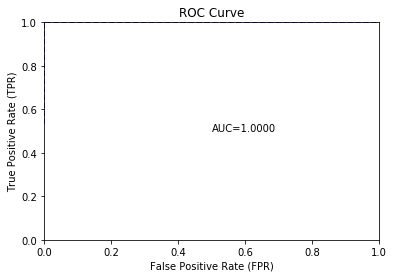

In [24]:
perf = glm_model.model_performance()  #train=True is the default, so it's not needed
perf.plot()

### III Regresion Logistica para Loan usando scikit-learn 

#### A-Using the transformation  OneHot for variable "Status Marital".This is the method recommended by scikit-learn

In [25]:
#A-Usando la codificacion OneHot para la variable Status Marital Esta es la que recomineda scikit-learn
df = pd.read_csv("https://academic.uprm.edu/eacuna/datosarbol.csv")
y=df['Prestamo']
data=df.iloc[:,0:6]
#Codificando 0-1 las Variables Sexo y CasPropia
lb_make = LabelEncoder()
data["Sexo"] = lb_make.fit_transform(data["Sexo"])
data['CasPropia']=lb_make.fit_transform(data["CasPropia"])
data1=data['StatustMarital']
#Aplicando OneHot encoding a la predictora StatustMarital
data2=pd.get_dummies(data1,prefix=['StatustMarital'])
data3=pd.concat([data.iloc[:,0:5],data2],axis=1)
y2=lb_make.fit_transform(y)
#Haciendo la regresion logistica ya calculando su precision
model = LogisticRegression(solver="newton-cg")
model = model.fit(data3, y2)
print("Coeficientes del modelo", model.coef_)

Coeficientes del modelo [[ 0.029659   -0.30786189  0.12159804  0.14661168  0.00391128  0.92715773
  -1.68462938  0.33328037  0.42418707]]


In [26]:
# Tasa de precision
model.score(data3, y2)
predictions = model.predict(data3)
print(classification_report(y2, predictions))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.94      1.00      0.97        15

   micro avg       0.96      0.96      0.96        25
   macro avg       0.97      0.95      0.96        25
weighted avg       0.96      0.96      0.96        25



#### B-Using  codificacion with variables dummies for the categorical variables

In [27]:
# B-Usando la codificacion con variables dummies
data4=pd.get_dummies(data1,prefix=['StatustMarital'], drop_first=True)
data5=pd.concat([data.iloc[:,0:5],data4],axis=1)
#Haciendo la regresion logistica ya calculando su precision
model = LogisticRegression()
model = model.fit(data5, y2)
model.score(data5, y2)
predictions = model.predict(data5)
print("coeficientes del modelo", model.coef_)
print(classification_report(y2, predictions))

C:\Users\edgar2017\Anaconda2\envs\ipykernel_py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


coeficientes del modelo [[-6.32085308e-01 -2.47603396e-01  2.14801833e-01 -2.42867178e-02
   9.26727855e-04 -1.61010971e+00 -1.86962182e-01  1.95097244e-01]]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.79      1.00      0.88        15

   micro avg       0.84      0.84      0.84        25
   macro avg       0.89      0.80      0.82        25
weighted avg       0.87      0.84      0.83        25



#### Using a trivial codification for the variable "Status Marital"

In [28]:
#Usando una codificacion Trivial de Status Marital
data['StatustMarital']=lb_make.fit_transform(data["StatustMarital"])
#Haciendo la regresion logistica ya calculando su precision
model = LogisticRegression()
model = model.fit(data, y2)
model.score(data, y2)
predictions = model.predict(data)
print("Coeficientes del modelo", model.coef_)
print(classification_report(y2, predictions))

C:\Users\edgar2017\Anaconda2\envs\ipykernel_py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Coeficientes del modelo [[-0.5576086  -0.21702577  0.33309214 -0.00594977  0.00070452 -0.16576325]]
              precision    recall  f1-score   support

           0       1.00      0.30      0.46        10
           1       0.68      1.00      0.81        15

   micro avg       0.72      0.72      0.72        25
   macro avg       0.84      0.65      0.64        25
weighted avg       0.81      0.72      0.67        25

